#  PROJET INTRODUCTION AU MACHINE LEARNING

**Sokhna Penda Toure** & **Fernanda Tchouacheu**

In [95]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://miro.medium.com/max/1724/0*8gb5Ir-2ROQne0WN")

In [162]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [97]:
#Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import des données

## Données train

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
my_path = "gdrive/My Drive/Amazon/"

In [100]:
df=pd.read_csv(my_path + 'train.txt', sep="\t",header=None,encoding='utf-8')
df.head(5)

,0
0,__label__2 Stuning even for the non-gamer...
1,__label__2 The best soundtrack ever to a...
2,__label__2 Amazing!: This soundtrack is m...
3,__label__2 Excellent Soundtrack: I truly ...
4,"__label__2 Remember, Pull Your Jaw Off T..."


In [101]:
df_train=pd.DataFrame(df[0].str.split(' ',n=1,expand=True))
df_train=pd.DataFrame(df_train.values,columns=['labels','sentences'])
df_train=df_train[['sentences','labels']]
df_train.head(3)

,sentences,labels
0,Stuning even for the non-gamer: This so...,__label__2
1,The best soundtrack ever to anything.: ...,__label__2
2,Amazing!: This soundtrack is my favorite...,__label__2


In [102]:
df_train=df_train.replace(['__label__2','__label__1'],[0,1])
df_train.head(10)

,sentences,labels
0,Stuning even for the non-gamer: This so...,0
1,The best soundtrack ever to anything.: ...,0
2,Amazing!: This soundtrack is my favorite...,0
3,Excellent Soundtrack: I truly like this ...,0
4,"Remember, Pull Your Jaw Off The Floor ...",0
5,an absolute masterpiece: I am quite sur...,0
6,Buyer beware: This is a self-published ...,1
7,Glorious story: I loved Whisper of the ...,0
8,A FIVE STAR BOOK: I just finished read...,0
9,Whispers of the Wicked Saints: This was...,0


In [103]:
print("shape", df_train.shape)

shape (3600000, 2)


In [0]:
df_train=df_train[0:10000] 

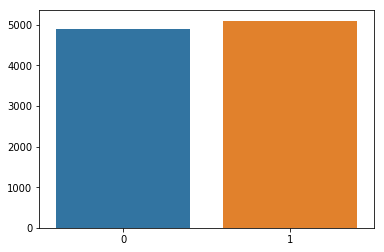

In [105]:
sns.barplot(np.unique(df_train['labels']),df_train.groupby('labels').count().values[:,0])

Il y'a un **léger déséquilibre** entre les labels

 ## Données test

In [106]:
df2=pd.read_csv(my_path + 'test.ft.txt', sep="\t",header=None)
df2.head(3)

,0
0,__label__2 Great CD: My lovely Pat has one of ...
1,__label__2 One of the best game music soundtra...
2,__label__1 Batteries died within a year ...: I...


In [107]:
df_test=pd.DataFrame(df2[0].str.split(' ',n=1,expand=True))
df_test=pd.DataFrame(df_test.values,columns=['labels','sentences'])
df_test=df_test[['sentences','labels']]

df_test.head(2)

,sentences,labels
0,Great CD: My lovely Pat has one of the GREAT v...,__label__2
1,One of the best game music soundtracks - for a...,__label__2


In [108]:
df_test=df_test.replace(['__label__2','__label__1'],[0,1])
df_test.head(5)

,sentences,labels
0,Great CD: My lovely Pat has one of the GREAT v...,0
1,One of the best game music soundtracks - for a...,0
2,Batteries died within a year ...: I bought thi...,1
3,"works fine, but Maha Energy is better: Check o...",0
4,Great for the non-audiophile: Reviewed quite a...,0


In [109]:
df_test.shape

(400000, 2)

In [0]:
df_test=df_test[0:2500]

In [111]:
df_test.head(5)

,sentences,labels
0,Great CD: My lovely Pat has one of the GREAT v...,0
1,One of the best game music soundtracks - for a...,0
2,Batteries died within a year ...: I bought thi...,1
3,"works fine, but Maha Energy is better: Check o...",0
4,Great for the non-audiophile: Reviewed quite a...,0


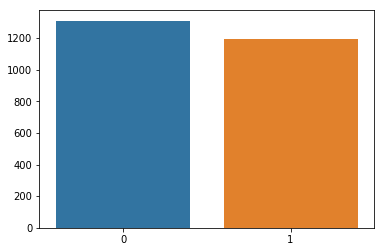

In [112]:
sns.barplot(np.unique(df_test['labels']),df_test.groupby('labels').count().values[:,0])

# Exploration des données : bag of words

In [0]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [0]:
X=df_train['sentences']
#combiner tous les sentences pour faciliter le comptage des mots
X_ess= ' '.join([text for text in df_train['sentences']])

Taille du dictionnaire :  31627


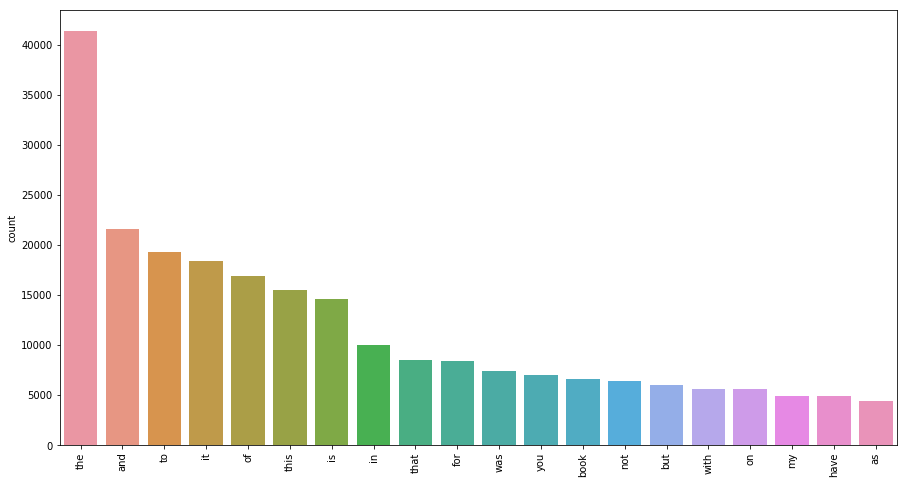

In [115]:
count_vect = CountVectorizer()
most_frequent_words_tot = most_frequent_words(count_vect,X)

# Pre-processing des données

## Suppression des caractères spéciaux

In [0]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text) #permet d'enlever les caractères speciaux comme
                                 #les chiffres et certaines ponctuations
    return text

df_train['sentences']=df_train['sentences'].apply(remove_special_characters)

In [117]:
df_train['sentences'][100]

' textbook  Book  shipped  quickly  and  was  in  excellent  condition  as  stated  Easy  transaction  would  buy  again '

## Supression des ponctuations

In [0]:
import string
exclude= set(string.punctuation)
l={"^_^","``","--","''"} 
exclude.update(l)

## Suppression des stopwords

Nous avons rajouté **Book** , **Movie** et **one** dans la liste des StopWord car ce sont des mots dispensable pour la prediction des classes

In [0]:
#Tokenisation du texte
tokenizer=ToktokTokenizer()
#Stopwords en anglais et ajouts des mots movie et book
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.append("movie")
stopword_list.append("book")
stopword_list.append("books")
stopword_list.append("one")
stopword_list.extend(exclude)

## Definition de la fonction de nettoyage des données

Dans un premier temps nous avons definir la fonction de nettoyage des données puis nous l'avons appliqué à l'ensemble de la data

In [0]:

#Fonction suppression
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

df_train['sentences']=df_train['sentences'].apply(remove_stopwords)

In [121]:
df_train['sentences'][0]

'Stuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game Chrono Cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

#  Visualisation des données

## Affichage des mots les plus fréquents

Taille du dictionnaire :  39999


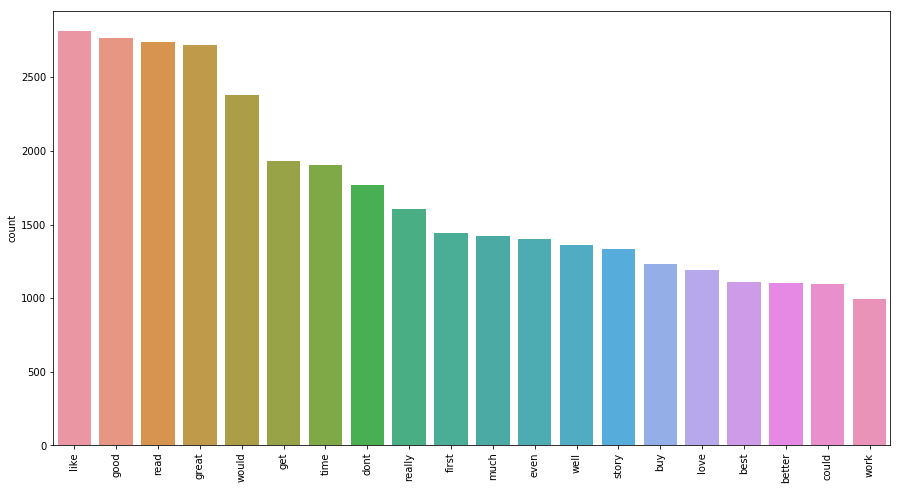

In [122]:
count_vect_sw = CountVectorizer(stop_words=stopword_list)
most_frequent_words_sw = most_frequent_words(count_vect_sw,df_train['sentences'])

### wordcloud

 on prend tous les mots des textes et on cherche à représenter la fréquence des mots utilisés par classe.

Pour cela, on a utilisé le package **WordCloud** - nuage de mots - qui prend en entrée une liste de mots.

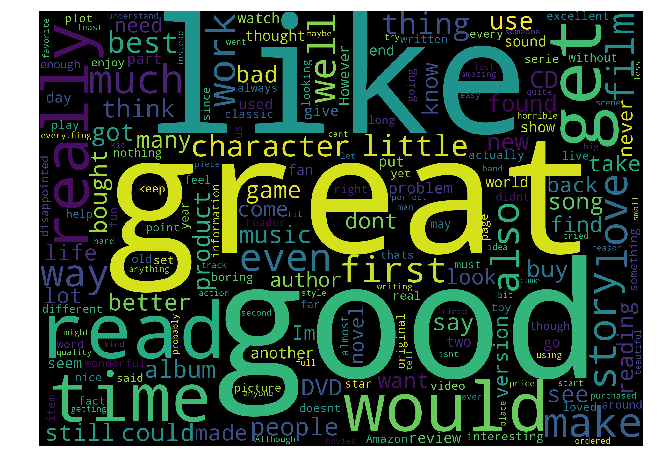

In [123]:
X_ess= ' '.join([text for text in df_train['sentences']])
from wordcloud import WordCloud
wordcloud = WordCloud(
                          stopwords=stopword_list,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(X_ess)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off');

Ensuite nous avons le wordcloud de chaque chaque label.Pour visualiser les mots les plus representatifs des differnts labels.

In [0]:
x_m_0=df_train[df_train.labels==0]
x_m_0.head()
X_m_ess= ' '.join([text for text in x_m_0.sentences])

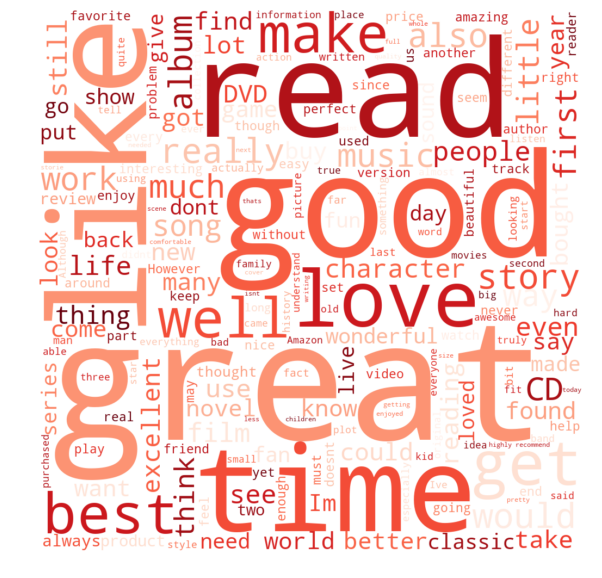

In [125]:
wordcloud = WordCloud(stopwords=stopword_list,colormap='Reds', width=1000, height=1000,
                      mode='RGBA',background_color='white').generate(X_m_ess)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [0]:
x_m_1=df_train[df_train.labels==1]
x_m_1.head()
X_m_ess_1= ' '.join([text for text in x_m_1.sentences])

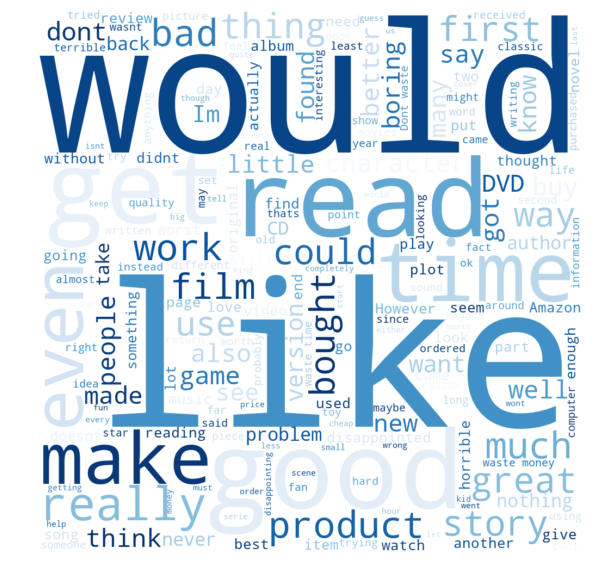

In [127]:
wordcloud = WordCloud(stopwords=stopword_list,colormap='Blues', width=1000, height=1000,
                      mode='RGBA',background_color='white').generate(X_m_ess_1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

On visualise les mots comme **good,Like** surement dû au fait que nous avons enlevé les stopwords de négation comme don't, I'am not etc... 

##  Nettoyage des données test

In [0]:
df_test['sentences']=df_test['sentences'].apply(remove_special_characters)
df_test['sentences']=df_test['sentences'].apply(remove_stopwords)

# Bag of words

In [169]:
#Count vectorizer
cv=CountVectorizer(max_features= 200000,min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(df_train.sentences)
#transformation des données test
cv_test_reviews=cv.transform(df_test.sentences)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (10000, 200000)
BOW_cv_test: (2500, 200000)


# Term Frequency-Inverse Document Frequency model (TFIDF)

In [170]:
tv=TfidfVectorizer(max_features= 200000,min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(df_train.sentences)
#transformation des données test
tv_test_reviews=tv.transform(df_test.sentences)

print('TFIDF_tv_train:',tv_train_reviews.shape)
print('TFIDF_tv_test:',tv_test_reviews.shape)


TFIDF_tv_train: (10000, 200000)
TFIDF_tv_test: (2500, 200000)


# Colonnes sentiments à utiliser pour les prédictions

In [171]:
train_sentiment=df_train['labels']
print(train_sentiment.shape)
test_sentiment=df_test['labels']
print(test_sentiment.shape)

(10000,)
(2500,)


# Prédiction des labels

## Régression logistique

In [172]:
#entrainement du model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Application au bag of word
lr_bow=lr.fit(cv_train_reviews,train_sentiment)
print(lr_bow)
#Application au tfidf
lr_tfidf=lr.fit(tv_train_reviews,train_sentiment)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


### Performances de la régression logistique sur les données test

In [173]:
#Prédiction pour le BOW
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Prédiction pour le tfidf
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 1 ... 1 1 0]
[1 0 1 ... 1 1 0]


#### Accuracy

In [174]:
#Accuracy sur le BOW
lr_bow_score=accuracy_score(test_sentiment,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy sur le tfidf
lr_tfidf_score=accuracy_score(test_sentiment,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5684
lr_tfidf_score : 0.566


#### Résumé de  la classification

In [175]:
#Résumé pour le BOW
lr_bow_report=classification_report(test_sentiment,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Résumé pour le tfidf
lr_tfidf_report=classification_report(test_sentiment,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.65      0.37      0.47      1309
    Negative       0.53      0.79      0.63      1191

    accuracy                           0.57      2500
   macro avg       0.59      0.58      0.55      2500
weighted avg       0.60      0.57      0.55      2500

              precision    recall  f1-score   support

    Positive       0.66      0.35      0.46      1309
    Negative       0.53      0.80      0.64      1191

    accuracy                           0.57      2500
   macro avg       0.60      0.58      0.55      2500
weighted avg       0.60      0.57      0.54      2500



#### Matrice de confusion

In [176]:
#matrice de confusion pour le BOW
cm_bow=confusion_matrix(test_sentiment,lr_bow_predict,labels=[1,0])
print(cm_bow)
#matrice de confusion pour le tfidf
cm_tfidf=confusion_matrix(test_sentiment,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[935 256]
 [823 486]]
[[956 235]
 [850 459]]


## Multinomial Naive Bayes 

In [177]:
#entrainement du model
mnb=MultinomialNB()
#Application au bag of word
mnb_bow=mnb.fit(cv_train_reviews,train_sentiment)
print(mnb_bow)
#Application au tfidf
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiment)
print(mnb_tfidf)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Performances du multinomial naive Bayes sur les données test

In [178]:
#Prédiction pour le BOW
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
##Prédiction pour le tfidf
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)



[0 0 1 ... 1 1 0]
[0 0 1 ... 1 1 0]


#### Accuracy 

In [179]:
#Accuracy sur le BOW
mnb_bow_score=accuracy_score(test_sentiment,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy sur le tfidf
mnb_tfidf_score=accuracy_score(test_sentiment,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)


mnb_bow_score : 0.5716
mnb_tfidf_score : 0.5724


#### Résumé de  la classification

In [140]:
#Résumé pour le BOW
mnb_bow_report=classification_report(test_sentiment,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Résumé pour le tfidf
mnb_tfidf_report=classification_report(test_sentiment,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.65      0.48      0.55      1309
    Negative       0.56      0.72      0.63      1191

    accuracy                           0.59      2500
   macro avg       0.60      0.60      0.59      2500
weighted avg       0.61      0.59      0.59      2500

              precision    recall  f1-score   support

    Positive       0.65      0.46      0.54      1309
    Negative       0.55      0.74      0.63      1191

    accuracy                           0.59      2500
   macro avg       0.60      0.60      0.58      2500
weighted avg       0.61      0.59      0.58      2500



#### Matrice de confusion

In [141]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiment,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiment,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[859 332]
 [687 622]]
[[876 315]
 [712 597]]


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
#Application au bag of word
RF_bow = RF.fit(cv_train_reviews,train_sentiment)
print(RF_bow)
#Application au tfidf
RF_tfidf = RF.fit(tv_train_reviews,train_sentiment)
print(RF_tfidf)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Performances du Random forest sur les données test

In [144]:
#Prédiction pour le BOW
RF_bow_predict=RF.predict(cv_test_reviews)
print(RF_bow_predict)
#Prédiction pour le tfidf
RF_tfidf_predict=RF.predict(tv_test_reviews)
print(RF_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


#### Accuracy 

In [145]:
#Accuracy sur le BOW
RF_bow_score=accuracy_score(test_sentiment,RF_bow_predict)
print("RF_bow_score :",RF_bow_score)
#Accuracy sur le tfidf
RF_tfidf_score=accuracy_score(test_sentiment,RF_tfidf_predict)
print("RF_tfidf_score :",RF_tfidf_score)

RF_bow_score : 0.478
RF_tfidf_score : 0.478


## Knn

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier(n_neighbors=3)
#Application au bag of word
knn_bow=knn.fit(cv_train_reviews,train_sentiment)
print(knn_bow)
##Application tfidf
knn_tfidf=knn.fit(tv_train_reviews,train_sentiment)
print(knn_tfidf)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


### Performances du Knn sur les données test

In [148]:
#Prédiction pour le BOW
knn_bow_predict=knn_bow.predict(cv_test_reviews)
print(knn_bow_predict)
#Prédiction pour le tfidf
knn_tfidf_predict=knn_tfidf.predict(tv_test_reviews)
print(knn_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


#### Accuracy 

In [149]:
#Accuracy sur le BOW
knn_bow_score=accuracy_score(test_sentiment,knn_bow_predict)
print("knn_bow_score :",knn_bow_score)
#Accuracy sur le tfidf
knn_tfidf_score=accuracy_score(test_sentiment,knn_tfidf_predict)
print("knn_tfidf_score :",knn_tfidf_score)

knn_bow_score : 0.482
knn_tfidf_score : 0.4784


## LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [0]:
#LDA = LinearDiscriminantAnalysis()
#Application au bag of word
#LDA_bow= LDA.fit(cv_train_reviews.toarray(),train_sentiment)
#print(LDA_bow)
##Application au tfidf
#LDA_tfidf = LDA.fit(cv_train_reviews.toarray(),train_sentiment)
#print(LDA_tfidf)


On constacte que l'alqorithme **LDA** ne fonctionne pas car
la matrice des données est une **matrice creuse**

# Bilan 1

On observe que **les accuracy des differents algorithmes de Machine Learning** varie entre **[0.59,0.45]**  ce qui est **très faible** nous avons opté à faire une reduction de dimension en utilisant **le test de chi-2** en faisant varié **le nombre de features** et ne selectionner que les mots qui participent réellement à la prediction des labels.

# Reduction de la dimension

## CHI-2

Text(0.5, 0, '$\\chi^2$')

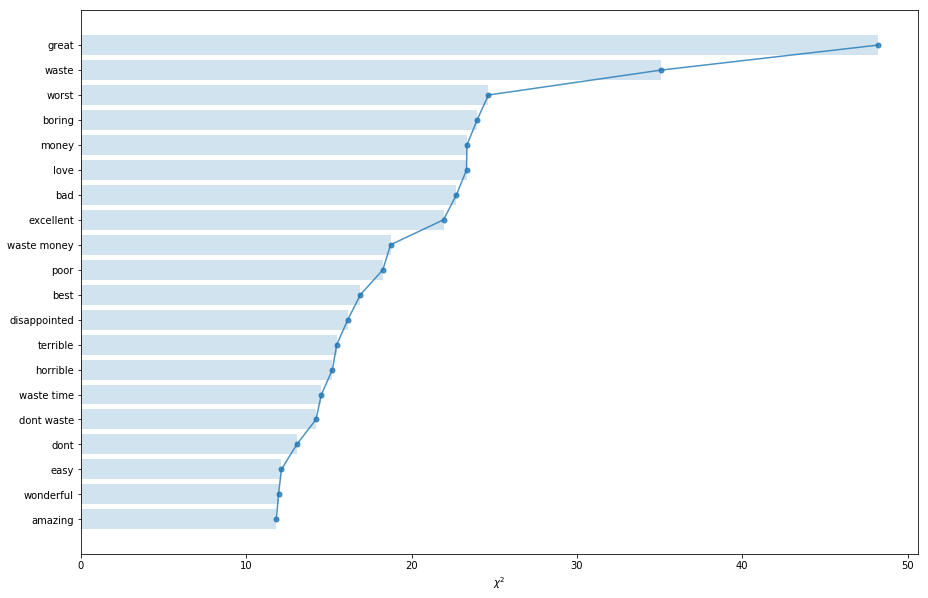

In [151]:
from sklearn.feature_selection import chi2
#Tfidf 
#tv=TfidfVectorizer(max_features= 300000, min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv=TfidfVectorizer ( max_features = 200000 , ngram_range = ( 1 , 3 ),stop_words=stopword_list)
#transformed train reviews
tv_train_reviews=tv.fit_transform(df_train.sentences)
#transformation des données test
tv_test_reviews=tv.transform(df_test.sentences)

chi2score = chi2 (tv_train_reviews, df_train['labels']) [ 0 ]



#print('Tfidf_train:',tv_train_reviews.shape)
#print('Tfidf_test:',tv_test_reviews.shape)


plt.figure(figsize=(15,10))
wscores =list(zip(tv.get_feature_names(), chi2score))
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 =list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

#### Test du chi-2 et Regression logistique 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(10000,200000,10000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(tv_train_reviews, train_sentiment)
    x_validation_chi2_selected = ch2.transform(tv_test_reviews)
    clf = LogisticRegression()
    clf.fit(x_train_chi2_selected, train_sentiment)
    score = clf.score(x_validation_chi2_selected, test_sentiment)
    ch2_result.append(score)
    #print "chi2 feature selection evaluation calculated for {} features".format(n)
    

In [153]:
ch2_result

[0.8448,
 0.842,
 0.8428,
 0.8432,
 0.842,
 0.8432,
 0.844,
 0.8444,
 0.8444,
 0.8436,
 0.8456,
 0.8452,
 0.8452,
 0.846,
 0.8452,
 0.8452,
 0.8436,
 0.844,
 0.8456]

## TFidf-Regression logistique

In [0]:
tfid_log_result=[]
for n in np.arange(10000,200000,10000):
    tvec = TfidfVectorizer ( max_features = n , ngram_range = ( 1 , 3 ),stop_words=stopword_list)
    x_train_tfidf_selected =tvec.fit_transform(df_train.sentences, train_sentiment)
    x_validation_tfidf_selected = tvec.transform(df_test.sentences)
    clf = LogisticRegression()
    clf.fit(x_train_tfidf_selected, train_sentiment)
    score = clf.score(x_validation_tfidf_selected, test_sentiment)
    tfid_log_result.append(score)

In [155]:
tfid_log_result

[0.85,
 0.852,
 0.8484,
 0.8484,
 0.8472,
 0.848,
 0.848,
 0.8476,
 0.848,
 0.8476,
 0.8472,
 0.848,
 0.848,
 0.8468,
 0.8464,
 0.8464,
 0.8448,
 0.8448,
 0.8448]

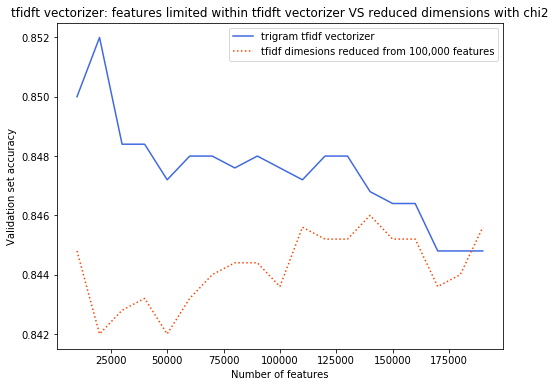

In [156]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(10000,200000,10000), tfid_log_result,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,200000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [0]:
from sklearn.ensemble import RandomForestClassifier
tfid_RF_result=[]
for n in np.arange(10000,200000,10000):
    tvec = TfidfVectorizer ( max_features = n , ngram_range = ( 1 , 3 ),stop_words=stopword_list)
    x_train_tfidf_selected =tvec.fit_transform(df_train.sentences, train_sentiment)
    x_validation_tfidf_selected = tvec.transform(df_test.sentences)
    clf = RandomForestClassifier()
    clf.fit(x_train_tfidf_selected, train_sentiment)
    score = clf.score(x_validation_tfidf_selected, test_sentiment)
    tfid_RF_result.append(score)

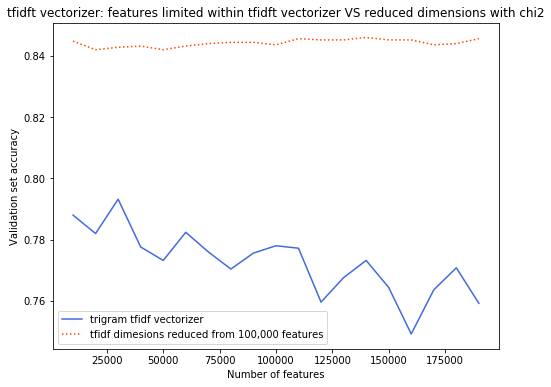

In [158]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(10000,200000,10000), tfid_RF_result,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,200000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [0]:
from sklearn.ensemble import RandomForestClassifier
tfid_NB_result=[]
for n in np.arange(10000,200000,10000):
    tvec = TfidfVectorizer ( max_features = n , ngram_range = ( 1 , 3 ),stop_words=stopword_list)
    x_train_tfidf_selected =tvec.fit_transform(df_train.sentences, train_sentiment)
    x_validation_tfidf_selected = tvec.transform(df_test.sentences)
    clf = MultinomialNB()
    clf.fit(x_train_tfidf_selected, train_sentiment)
    score = clf.score(x_validation_tfidf_selected, test_sentiment)
    tfid_NB_result.append(score)

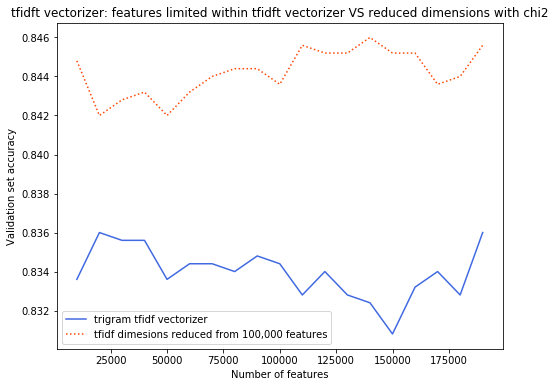

In [166]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(10000,200000,10000), tfid_NB_result,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,200000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

# Conclusion

 On constate que les accuracy sont considérablement plus élevés avec la réduction de dimensions par le $\chi^2$. Concernant les méthodes, celle qui se dégage le plus est le **Multinomial Naive Bayes** avec une accuracy de ..., elle est donc celle sélectionnée pour notre modèle.
Une prochaine étape pourrait être la mise en place d'une Cross-validation afin de confirmer les résultats obtenus.